In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as pltth
import random
%matplotlib inline

In [2]:
dataset=pd.read_csv('Ads_CTR_Optimisation.csv')

__Step1__ At each round $n$, we consider two numbers for each ad $i$:
* $N_i^1(n)$ - the unmber of times the ad $i$ got reward 1 up to round $n$
* $N_i^0(n)$ - the number of times the ad$i$ got  reward 0 up to round $n$

__Step2__ For eachad$i$, we take a random drow from the distribution below: $$\theta_i(n) =\beta(N_i^1(n)+1,N_i^0(n)+1) $$

__Step3__ We select the ad that has the hightest $\theta_i(n)$

In [14]:
N=10000
d=10
ads_selected=[]
numbers_of_rewards_1=[0]*d  # the number of times each ad is clicked
numbers_of_rewards_0 = [0]*d
total_rewards=0

for n in range(0,N):
    ad=0
    max_random=0
    for i in range(0,d):
        random_beta= random.betavariate(numbers_of_rewards_1[i]+1, numbers_of_rewards_0[i]+1)
        if random_beta > max_random:
            max_random= random_beta
            ad=i
    ads_selected.append(ad)
    reward= dataset.values[n, ad]
    total_rewards=total_rewards+reward
    if reward==1:
        numbers_of_rewards_1[ad]= numbers_of_rewards_1[ad]+1
    else:
        numbers_of_rewards_0[ad]= numbers_of_rewards_0[ad]+1

In [15]:
total_rewards

2615

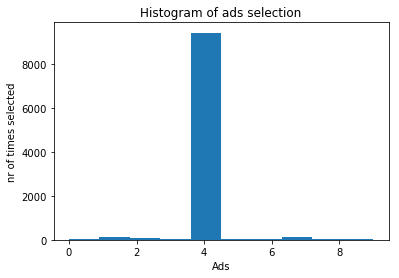

In [18]:
plt.hist(ads_selected)
plt.title('Histogram of ads selection')
plt.xlabel('Ads')
plt.ylabel('nr of times selected')
plt.show()